# Import the necessary libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string
from nltk.corpus import stopwords
from wordcloud import WordCloud

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Load the datasets

In [ ]:
# loading the datasets
data1 = pd.read_csv('/content/drive/MyDrive/Sarcasm data1.csv')
data2 = pd.read_csv('/content/drive/MyDrive/Sarcasm data2.csv')
data = pd.concat([data1, data2], ignore_index=True)

# Display the concatenated data
print(data.head())

                                        article_link  \
0  https://www.huffingtonpost.com/entry/versace-b...   
1  https://www.huffingtonpost.com/entry/roseanne-...   
2  https://local.theonion.com/mom-starting-to-fea...   
3  https://politics.theonion.com/boehner-just-wan...   
4  https://www.huffingtonpost.com/entry/jk-rowlin...   

                                            headline  is_sarcastic  
0  former versace store clerk sues over secret 'b...             0  
1  the 'roseanne' revival catches up to our thorn...             0  
2  mom starting to fear son's web series closest ...             1  
3  boehner just wants wife to listen, not come up...             1  
4  j.k. rowling wishes snape happy birthday in th...             0  


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55328 entries, 0 to 55327
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   article_link  55328 non-null  object
 1   headline      55328 non-null  object
 2   is_sarcastic  55328 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 1.3+ MB


# Preprocessing

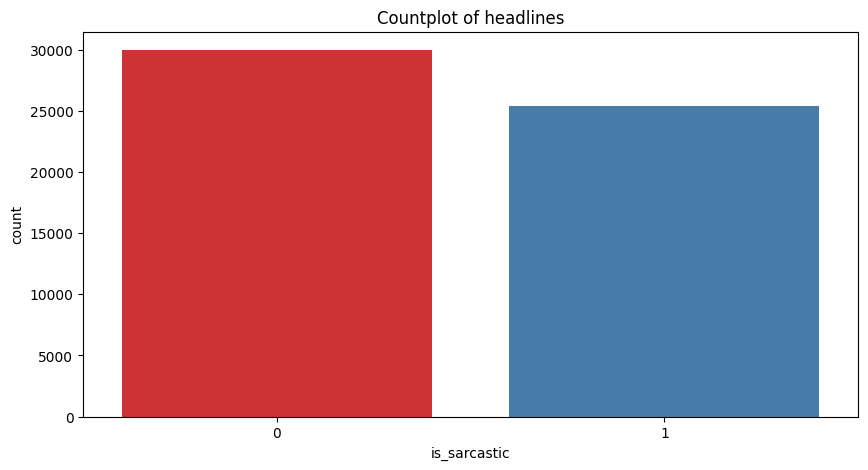

In [ ]:
# Check the dataset label balance or not

# Check number of headlines by is_sarcastics
plt.figure(figsize=(10, 5))
sns.countplot(x='is_sarcastic', data=data, palette="Set1").set_title(
    "Countplot of headlines")
plt.show()

## Text cleaning

In [ ]:

nltk.download('stopwords')
stopwords_list = stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
def clean_text(sentences):
    # convert text to lowercase
    text = sentences.lower()
    # remove text in square brackets
    text = re.sub('\[.*?\]', '', text)
    # removing punctuations
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    # removing words containing digits
    text = re.sub('\w*\d\w*', '', text)
    # Join the words
    text = ' '.join([word for word in text.split() if word not in stopwords_list])
    return text

print(data['headline'].iloc[1])
clean_text(data['headline'].iloc[1])

the 'roseanne' revival catches up to our thorny political mood, for better and worse


'roseanne revival catches thorny political mood better worse'

In [ ]:
#

In [ ]:
data['cleaned_headline']=data['headline'].map(clean_text)

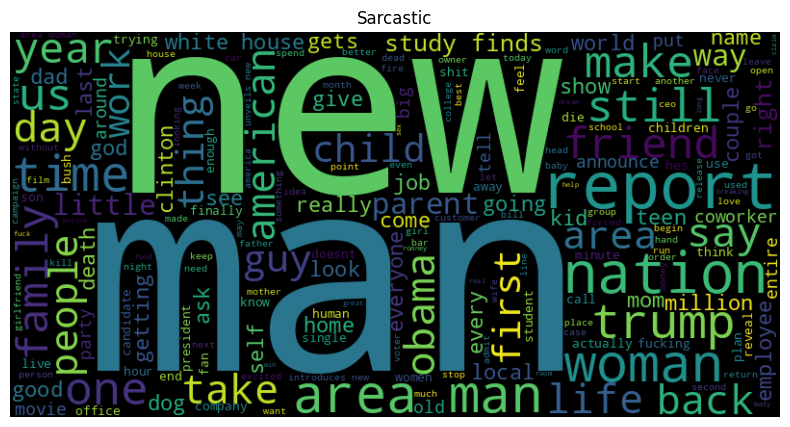

In [ ]:
# Combine all sarcastic cleaned headlines into a single text
Sarcastic_text = ' '.join(data['cleaned_headline'][data['is_sarcastic']==1].tolist())

# Create a WordCloud object with specified width, height, and background color
wordcloud = WordCloud(width=800, height=400,
                      background_color='black').generate(Sarcastic_text)

# Display the WordCloud without axes
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Sarcastic')
plt.show()

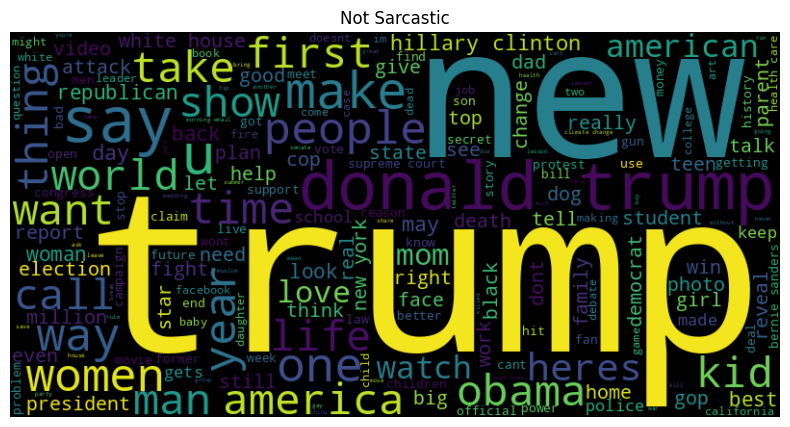

In [ ]:
# Combine all non-sarcastic cleaned headlines into a single text
Non_Sarcastic_text = ' '.join(data['cleaned_headline'][data['is_sarcastic']==0].tolist())

# Create a WordCloud object with specified width, height, and background color
wordcloud = WordCloud(width=800, height=400,
                      background_color='black').generate(Non_Sarcastic_text)

# Display the WordCloud without axes
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Not Sarcastic')
plt.show()

# Split train and test dataset

In [ ]:
text = data['cleaned_headline'].tolist()
label = data['is_sarcastic'].tolist()

In [ ]:
# train :test : validation = 80:10:10
train_portion = .8

# Set the train size using training_portion arg
train_size = int(len(text) * train_portion)

# Training dataset
train_text = text[:train_size]
train_label = label[:train_size]
# Validations dataset
valid_size = train_size+int((len(text)-train_size)/2)
val_text = text[train_size:valid_size]
val_label = label[train_size:valid_size]
# Testing dataset
test_text = text[valid_size:]
test_label = label[valid_size:]

# Check
print('Training data :',len(train_text),len(train_label))
print('Validations data :',len(val_text),len(val_label))
print('Testing data :',len(test_text),len(test_label))

Training data : 44262 44262
Validations data : 5533 5533
Testing data : 5533 5533


In [ ]:
# Set parameters
vocab_size = 10000      # Max len of unique words
embedding_dim = 200     # Embedding dimension value
max_length = 60         # Max length of sentence
padding_type = 'post'   # pad_sequences arg
oov_tok = '<OOV>'       # Unknow words = <OOV>

# Tokenizing and padding
# Create a tokenizer with a specified vocabulary size and out-of-vocabulary token
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
# Fit the tokenizer on the training text data to create word-to-index mapping
tokenizer.fit_on_texts(train_text)

In [ ]:
# Get the word index from the tokenizer
word_index = tokenizer.word_index
word_index

{'<OOV>': 1,
 'new': 2,
 'man': 3,
 'trump': 4,
 'us': 5,
 'report': 6,
 'one': 7,
 'area': 8,
 'woman': 9,
 'donald': 10,
 'says': 11,
 'day': 12,
 'like': 13,
 'get': 14,
 'first': 15,
 'time': 16,
 'people': 17,
 'trumps': 18,
 'obama': 19,
 'house': 20,
 'life': 21,
 'still': 22,
 'make': 23,
 'white': 24,
 'women': 25,
 'back': 26,
 'clinton': 27,
 'world': 28,
 'could': 29,
 'years': 30,
 'family': 31,
 'americans': 32,
 'way': 33,
 'study': 34,
 'black': 35,
 'gop': 36,
 'bill': 37,
 'would': 38,
 'best': 39,
 'cant': 40,
 'really': 41,
 'police': 42,
 'american': 43,
 'watch': 44,
 'show': 45,
 'school': 46,
 'know': 47,
 'home': 48,
 'good': 49,
 'nation': 50,
 'going': 51,
 'finds': 52,
 'say': 53,
 'things': 54,
 'president': 55,
 'death': 56,
 'video': 57,
 'last': 58,
 'love': 59,
 'parents': 60,
 'year': 61,
 'mom': 62,
 'big': 63,
 'state': 64,
 'health': 65,
 'hillary': 66,
 'every': 67,
 'kids': 68,
 'need': 69,
 'getting': 70,
 'may': 71,
 'gets': 72,
 'campaign': 73,

In [ ]:
# Convert training text to sequences of word indices
tokenizer.texts_to_sequences(train_text[:5])

[[204, 1, 740, 2953, 2235, 245, 35, 1958, 2515, 8487],
 [8488, 3234, 2422, 8489, 289, 3081, 151, 853],
 [62, 597, 719, 1063, 1840, 496, 4199, 116, 9676],
 [1320, 130, 337, 1439, 219, 3385, 1, 703],
 [4779, 5143, 679, 1, 454, 490, 1137, 33]]

In [ ]:
# Tokenize and pad the training text data
# Convert training text to sequences of word indices
train_indices = tokenizer.texts_to_sequences(train_text)
# Pad sequences to a fixed length
train_padded = pad_sequences(train_indices,
                             padding=padding_type,
                             maxlen=max_length)

In [ ]:
# Convert validation text to sequences of word indices
val_indices = tokenizer.texts_to_sequences(val_text)
#Pad sequences to a fixed length
validation_padded = pad_sequences(val_indices,
                                  padding=padding_type,
                                  maxlen = max_length)

# Convert test text to sequences of word indices
test_indices = tokenizer.texts_to_sequences(test_text)
#Pad sequences to a fixed length
test_padded = pad_sequences(test_indices,
                            padding=padding_type,
                            maxlen = max_length)

# Check
print('Training vector :',train_padded.shape)
print('Validations vector :',validation_padded.shape)
print('Testing vector :',test_padded.shape)

Training vector : (44262, 60)
Validations vector : (5533, 60)
Testing vector : (5533, 60)


In [ ]:
# Decode the sample training vector
tokenizer.sequences_to_texts([train_padded[0].tolist()])

['former <OOV> store clerk sues secret black code minority shoppers <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV>']

In this code, the sequence of word indices in the first training vector (train_padded[0]) is converted back into the corresponding text using the tokenizer's reverse mapping. This helps verify the conversion process and check the quality of the preprocessing.



In [ ]:
# Prepare labels for model
training_labels_final = np.array(train_label)
validation_labels_final = np.array(val_label)
testing_labels_final = np.array(test_label)


# Check shapes
print('Training vector :',training_labels_final.shape)
print('Validations vector :',validation_labels_final.shape)
print('Testing vector :',testing_labels_final.shape)

Training vector : (44262,)
Validations vector : (5533,)
Testing vector : (5533,)


In [ ]:
# Import the TensorFlow library
import tensorflow as tf

# Define a sequential neural network model
model = tf.keras.Sequential([
    # Embedding layer for creating word embeddings
    tf.keras.layers.Embedding(
        vocab_size, embedding_dim, input_length=max_length),

    # GlobalMaxPooling layer to extract relevant features
    tf.keras.layers.GlobalMaxPool1D(),

    # First Dense layer with 40 neurons and ReLU activation
    tf.keras.layers.Dense(40, activation='relu'),

    # Dropout layer to prevent overfitting
    tf.keras.layers.Dropout(0.5),

    # Second Dense layer with 20 neurons and ReLU activation
    tf.keras.layers.Dense(20, activation='relu'),

    # Dropout layer to prevent overfitting
    tf.keras.layers.Dropout(0.5),

    # Third Dense layer with 10 neurons and ReLU activation
    tf.keras.layers.Dense(10, activation='relu'),

    # Dropout layer to prevent overfitting
    tf.keras.layers.Dropout(0.2),

    # Final Dense layer with 1 neuron and sigmoid activation for binary classification
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 60, 200)           2000000   
                                                                 
 global_max_pooling1d (Globa  (None, 200)              0         
 lMaxPooling1D)                                                  
                                                                 
 dense (Dense)               (None, 40)                8040      
                                                                 
 dropout (Dropout)           (None, 40)                0         
                                                                 
 dense_1 (Dense)             (None, 20)                820       
                                                                 
 dropout_1 (Dropout)         (None, 20)                0         
                                                        

In [ ]:
# Compile the model with specified loss function, optimizer, and evaluation metrics
model.compile(loss='binary_crossentropy',
              optimizer='adam', metrics=['accuracy'])

In [ ]:
# Set the number of training epochs
num_epochs = 5

# Fit the model to the training data and validate on the validation data
history = model.fit(
    train_padded, training_labels_final,
    epochs=num_epochs,
    validation_data=(validation_padded, validation_labels_final)
)

Epoch 1/5
1384/1384 [==============================] - 22s 15ms/step - loss: 0.4852 - accuracy: 0.7619 - val_loss: 0.2764 - val_accuracy: 0.8865
Epoch 2/5
1384/1384 [==============================] - 20s 15ms/step - loss: 0.2277 - accuracy: 0.9191 - val_loss: 0.1649 - val_accuracy: 0.9344
Epoch 3/5
1384/1384 [==============================] - 22s 16ms/step - loss: 0.1086 - accuracy: 0.9652 - val_loss: 0.1257 - val_accuracy: 0.9642
Epoch 4/5
1384/1384 [==============================] - 22s 16ms/step - loss: 0.0454 - accuracy: 0.9860 - val_loss: 0.1103 - val_accuracy: 0.9790
Epoch 5/5
1384/1384 [==============================] - 21s 15ms/step - loss: 0.0258 - accuracy: 0.9929 - val_loss: 0.1110 - val_accuracy: 0.9814


Here, we are setting the number of cycles for model and then using model.fit() to train the model using the provided data and evaluates its performance on validation data.

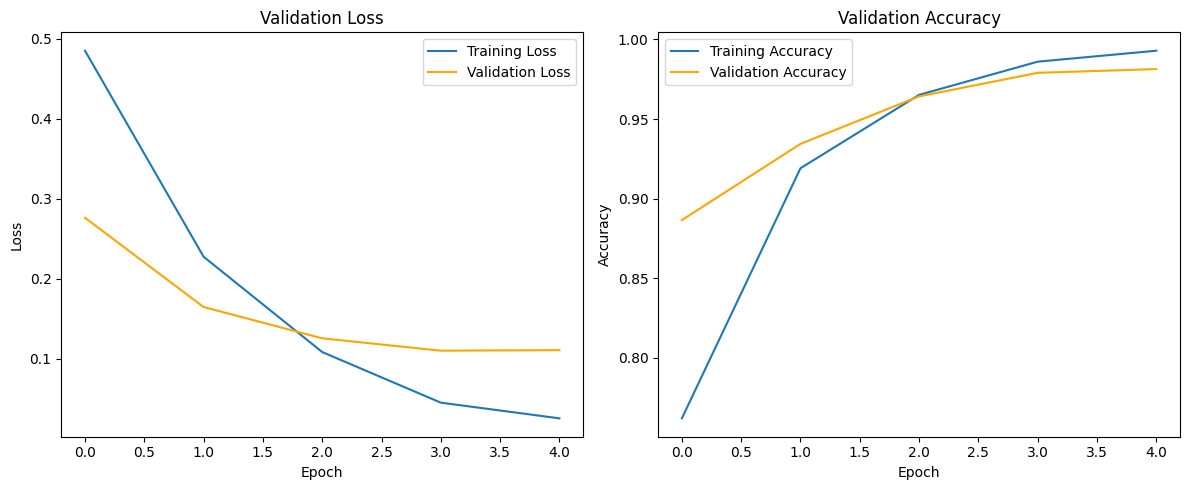

In [ ]:
# Create a figure with subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Plot validation loss
ax1.plot(history.history['loss'], label='Training Loss')
ax1.plot(history.history['val_loss'], label='Validation Loss',color='orange')
ax1.set_title('Validation Loss')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss')
ax1.legend()

# Plot validation accuracy
ax2.plot(history.history['accuracy'], label='Training Accuracy')
ax2.plot(history.history['val_accuracy'], label='Validation Accuracy', color='orange')
ax2.set_title('Validation Accuracy')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Accuracy')
ax2.legend()

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

In [ ]:
loss, accuracy = model.evaluate(test_padded,testing_labels_final)
print(f'Accurcy on test dataset :{round(accuracy*100,2)}%')

173/173 [==============================] - 0s 880us/step - loss: 0.0840 - accuracy: 0.9839
Accurcy on test dataset :98.39%


This code evaluates a trained machine learning model using the test dataset. It calculates the loss and accuracy of the model's predictions on the test data, and then prints the accuracy percentage rounded to two decimal places.

In [ ]:
pred_prob = model.predict(test_padded)
pred_label = [1 if prob >= 0.5 else 0 for prob in pred_prob]
pred_label[:5]

173/173 [==============================] - 0s 743us/step


[1, 1, 1, 1, 0]

his code segment makes predictions using a trained model on the test data. It calculates the predicted probability values and converts them to predicted labels based on a threshold of 0.5. The first five predicted labels are displayed.

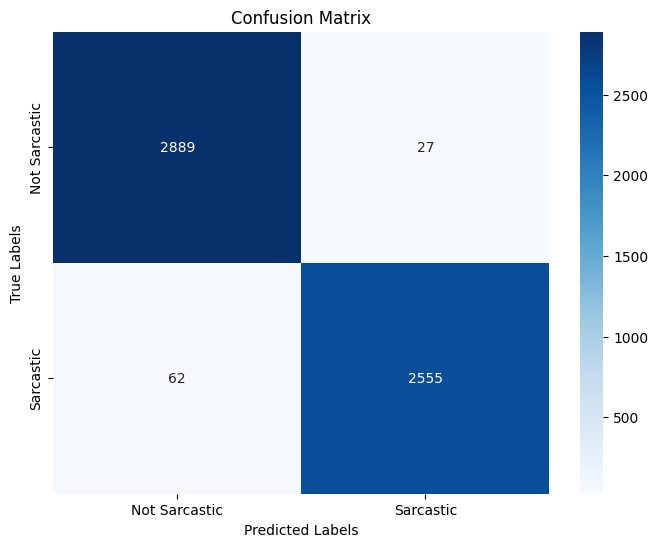

In [ ]:
# Compute confusion matrix using the predicted classes and true labels
conf_matrix = confusion_matrix(testing_labels_final, pred_label)

# Plot the confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not Sarcastic', 'Sarcastic'],
            yticklabels=['Not Sarcastic', 'Sarcastic'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# Make prediction
pred_probs = model.predict(validation_padded)  # Get predicted probabilities
pred_classes = (pred_probs > 0.5).astype(int)   # Convert to binary classes

# Print Classification Report
print("\nClassification Report:")
print(classification_report(val_label, pred_classes,
                            target_names=['Not Sarcastic', 'Sarcastic']))

173/173 [==============================] - 0s 862us/step

Classification Report:
               precision    recall  f1-score   support

Not Sarcastic       0.97      0.99      0.98      2903
    Sarcastic       0.99      0.97      0.98      2630

     accuracy                           0.98      5533
    macro avg       0.98      0.98      0.98      5533
 weighted avg       0.98      0.98      0.98      5533



In [ ]:
while True:
    # Prompt the user to input a headline or exit
    user_input = input(
        "Enter a headline for prediction (or type 'exit' to quit): ")

    # Check if the user wants to exit
    if user_input.lower() == 'exit':
        break

    # Clean and preprocess user input
    cleaned_input = clean_text(user_input)
    tokenized_input = tokenizer.texts_to_sequences(
        [cleaned_input])  # Tokenize the cleaned text
    padded_input = pad_sequences(
        tokenized_input, maxlen=max_length, padding=padding_type)  # Pad the tokenized text

    # Predict sarcasm
    prediction = model.predict(padded_input)

    # Print the prediction result
    if prediction >= 0.5:
        print(f"Headline: {user_input}\nPrediction: Sarcastic")
    else:
        print(f"Headline: {user_input}\nPrediction: Not Sarcastic")

Enter a headline for prediction (or type 'exit' to quit): Hello, what's happenning now?
1/1 [==============================] - 0s 12ms/step
Headline: Hello, what's happenning now?
Prediction: Not Sarcastic
Enter a headline for prediction (or type 'exit' to quit): exit
